<a href="https://colab.research.google.com/github/Trish-Pat/DIBootCamp/blob/main/Daily_challenge_week8_day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [ ]:
# TODO : Import the Data from the kaggle API
df = pd.read_csv('AB_Test_Results.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


# Data Understanding

In [ ]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame,
# Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID

# Info
print("===== Info : =====")
df.info()

# Columns
print("\n===== Columns : =====")
print(df.columns)

# Missing Values
print("\n===== Missing Values : =====")
print(df.isnull().sum())

# Descriptive Statistics
print("\n===== Descriptive Statistics : =====")
print(df.describe())

# Value Counts for VARIANT_NAME
print("\n===== Value Counts for VARIANT_NAME : =====")
print(df.groupby('VARIANT_NAME').value_counts())

# Counting Unique Users in USER_ID
print("\n===== Counting Unique Users in USER_ID : =====")
print(df['USER_ID'].nunique())


===== Info : =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB

===== Columns : =====
Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')

===== Missing Values : =====
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

===== Descriptive Statistics : =====
            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000

===== Value Counts for VARIANT_NAME : =====
VARIANT_NAME  USER_ID  R

# Average Revenue by VARIANT_NAME

In [ ]:
#TODO
df.groupby('VARIANT_NAME')['REVENUE'].mean()

,REVENUE
VARIANT_NAME,
control,0.129013
variant,0.070070


What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

*We want to test the null hypothesis that the average revenue is the same in both groups (H₀: M₁ = M₂), against the alternative that the averages differ (H₁: M₁ ≠ M₂).*

*In the following steps, we will test the assumptions required for statistical testing (such as normality and variance equality), and then apply an appropriate test to determine whether this difference is statistically significant.*

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [ ]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?
# Control group
stat, p_value = shapiro(df[df['VARIANT_NAME'] == 'control']['REVENUE'])
print('Control group - Shapiro Statistic: %.3f, p-value: %.3f' % (stat, p_value))

# Variant group
stat, p_value = shapiro(df[df['VARIANT_NAME'] == 'variant']['REVENUE'])
print('Variant group - Shapiro Statistic: %.3f, p-value: %.3f' % (stat, p_value))

Control group - Shapiro Statistic: 0.018, p-value: 0.000
Variant group - Shapiro Statistic: 0.027, p-value: 0.000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


*In both cases, the p-value is equal to 0, which is far below the 0.05 threshold.
Therefore, we reject the null hypothesis of normality for both groups.
This means that the revenue data in both groups does not follow a normal distribution, and we should use non-parametric statistical tests for comparing them.*

In [ ]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?
control_revenue = df[df['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

stat, p_value = levene(control_revenue, variant_revenue)
print('Levene Statistic: %.3f, p-value: %.3f' % (stat, p_value))

Levene Statistic: 1.616, p-value: 0.204


*The Levene’s test was used to assess the equality of variances between the control and variant groups.*

*The test returned a p-value of 0.204, which is greater than the 0.05 threshold.
Therefore, we do not reject the null hypothesis, and we can assume that the variances between the two groups are equal.*

# Non-Parametric Test (mannwhitneyu Test)

In [ ]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?

stat, p_value = mannwhitneyu(control_revenue, variant_revenue)
print('Mann-Whitney U Statistic: %.3f, p-value: %.3f' % (stat, p_value))

Mann-Whitney U Statistic: 12521564.000, p-value: 0.478


*The Mann-Whitney U test comparing revenues between the control and variant groups returned a p-value of 0.478.
As this is greater than 0.05, we do not reject the null hypothesis.
There is no statistically significant difference in revenue distributions between the two groups.*

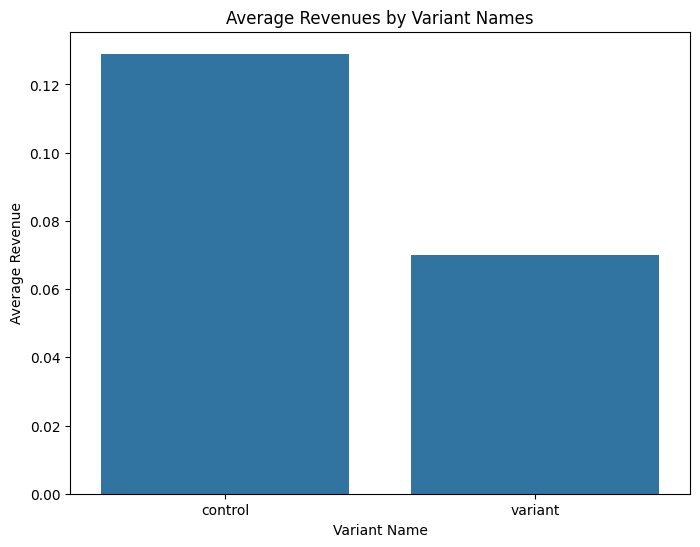

In [ ]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library
average_revenue_by_variant = df.groupby('VARIANT_NAME')['REVENUE'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='VARIANT_NAME', y='REVENUE', data=average_revenue_by_variant)

plt.title('Average Revenues by Variant Names')
plt.xlabel('Variant Name')
plt.ylabel('Average Revenue')

plt.show()